# User Knowledge Modeling Data Analysis: Group07 Project Proposal

# Introduction:

Electrical Direct Current Machines (DC) are machines that convert electrical energy into mechanical energy. The User Knowledge Modeling Data Set describes the students' knowledge level on the subject of Electrical DC Machines. They are important as they are used in common household appliances. Therefore, improving the learning and teaching of these machines by studying students’ knowledge of them is valuable.

The data set include three sheets: Information, Training_Data, and Test_Data. Sheet 1 includes the description of this data set,  such as characteristics, class distribution, and attribute information. 
Sheet 2 and 3 include five columns:
  - `STG` (dbl): degree of study time for goal object materials
  - `SCG`(dbl): degree of repetition number of user for goal object materials
  - `STR`(dbl):  degree of study time of the user for related objects with goal object
  - `LPR`(dbl): exam performance of user for related objects with goal object
  - `PEG`(dbl): exam performance of users for goal objects
  - `UNS`(char): knowledge level of user, classified into four categories: very low, low, middle, and high.
  
Using K-nearest neighbor algorithm, we’ll be predicting a categorical class for an observation given other known variables, a method known as classification.

Our predictive question: “What would a future user’s knowledge level based on the five user attributes?”

# Preliminary Exploratory Data Analysis:

## Demonstrate that the dataset can be read from the web into R 
Before the data analysis, we need to familiarize ourselves with the data by exploring the data. The first step is to load the data directly from the web. Previewing the data set, we notice that there are 3 sheets in our data set, which is information, training_data and test_data respectively. Since we are only interested in the training data for now, we specify sheet = 2 in our read_excel function.

In [3]:
library(tidyverse)
library(readxl)

# read the dataset into R
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
download.file(url, destfile = "user.xls")
messy_user_data <- read_excel("user.xls", sheet = 2)
head(messy_user_data) # to show the first 6 observations in this dataframe

New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)


## Clean and wrangle your data into a tidy format
We need to clean and wrangle the messy_user_data for the following reasons:
1. The `...7`, and `...8` column are all N/A, and the`Attribute Information` column provides additional information about our data. Therefore, we should exclude them from the data frame. 
2. The UNS columns stored their values as variable character(char). However, UNS represents categories and should be stored as factor.
To solve these two problems, We use `select` function to select useful columns and then use `mutate` to change the values stored in UNS as factors.

In [6]:
# Clean and wrangle the data into a tidy format
user_data <- messy_user_data |>
    select(STG: UNS) |>
    mutate(UNS = as_factor(UNS))
head(user_data) # to show the first 6 observations in this dataframe

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


## Using only training data, summarize the data in at least one table
### 1. The summarization of the number of and the percentage of the observation in each UNS class is presented below:

In [74]:
# the number of observation in total the data set
n_obs <- nrow(user_data)
# the number of and the percentage of the observation in each UNS class
UNS_count<- user_data |>
    group_by(UNS)|>
    summarize(
        count = n(),
        percentage = n()/ n_obs * 100)
UNS_count

UNS,count,percentage
<fct>,<int>,<dbl>
very_low,24,9.302326
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527


### 2. The summarization of the means of the predictor variables you plan to use in your analysis is presented below:

In [75]:
## The mean of each predictor variable
predictors_mean <- user_data |>
    select(STG:PEG) |>
    map_df(mean)
predictors_mean

STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


In [76]:
## The mean of each predictor variable in each UNS class
STG_mean_by_group <- user_data |>
    group_by(UNS) |>
    summarize(STG_mean = mean(STG))

SCG_mean_by_group <- user_data |>
    group_by(UNS) |>
    summarize(SCG_mean = mean(SCG))

STR_mean_by_group <- user_data |>
    group_by(UNS) |>
    summarize(STR_mean = mean(STR))

LPR_mean_by_group <- user_data |>
    group_by(UNS) |>
    summarize(LPR_mean = mean(LPR))

PEG_mean_by_group <- user_data |>
    group_by(UNS) |>
    summarize(PEG_mean = mean(PEG))

predictors_mean_by_group <- merge(STG_mean_by_group, SCG_mean_by_group) |>
    merge(STR_mean_by_group) |>
    merge(LPR_mean_by_group) |>
    merge(PEG_mean_by_group)
predictors_mean_by_group

UNS,STG_mean,SCG_mean,STR_mean,LPR_mean,PEG_mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,0.4216508,0.4231905,0.5016667,0.5012698,0.77253968
Low,0.3211446,0.3370000,0.4307229,0.4973494,0.23762651
Middle,0.3999773,0.3679205,0.5068182,0.3428409,0.54238636
very_low,0.3057917,0.1981250,0.3662500,0.3587500,0.09083333


We summarize both the overall mean of each predictor variable and the mean of each predictor variable in different UNS classes. From the above two summarization, we can see that there is a large difference between the per-group mean of SCG and PEG compared to other predictor variables.

## Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



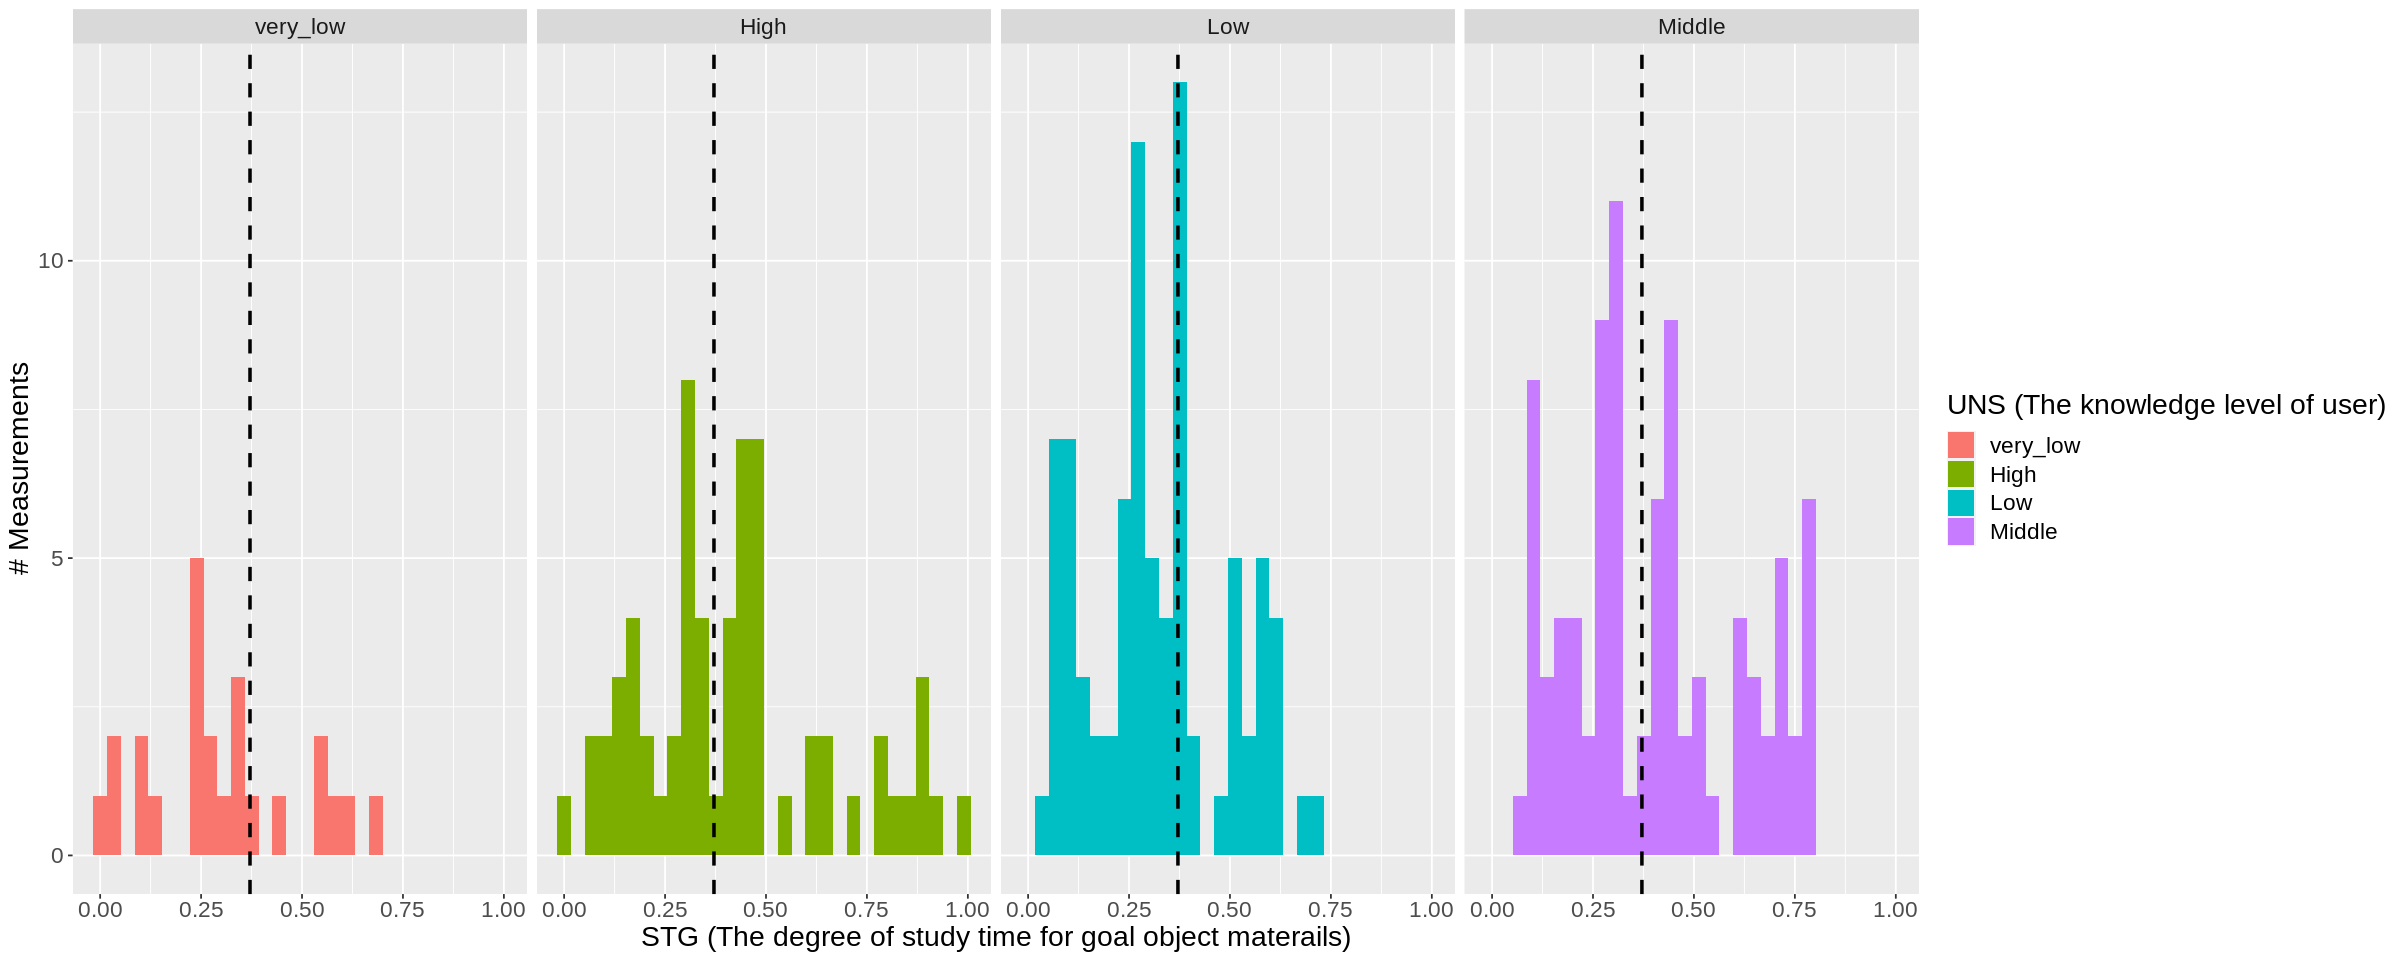

In [77]:
# The distribution of STG
options(repr.plot.width = 20, repr.plot.height = 8) 
STG_distribution <- user_data |>
    ggplot(aes(x = STG, fill = UNS)) + 
    geom_histogram() +
    facet_grid(cols = vars(UNS)) +
    geom_vline(xintercept = 0.3711473, linetype = "dashed", size = 1.0) +
    labs(x = "STG (The degree of study time for goal object materails)", 
         y = "# Measurements", 
         fill = "UNS (The knowledge level of user)") +
  theme(text = element_text(size = 17))
STG_distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



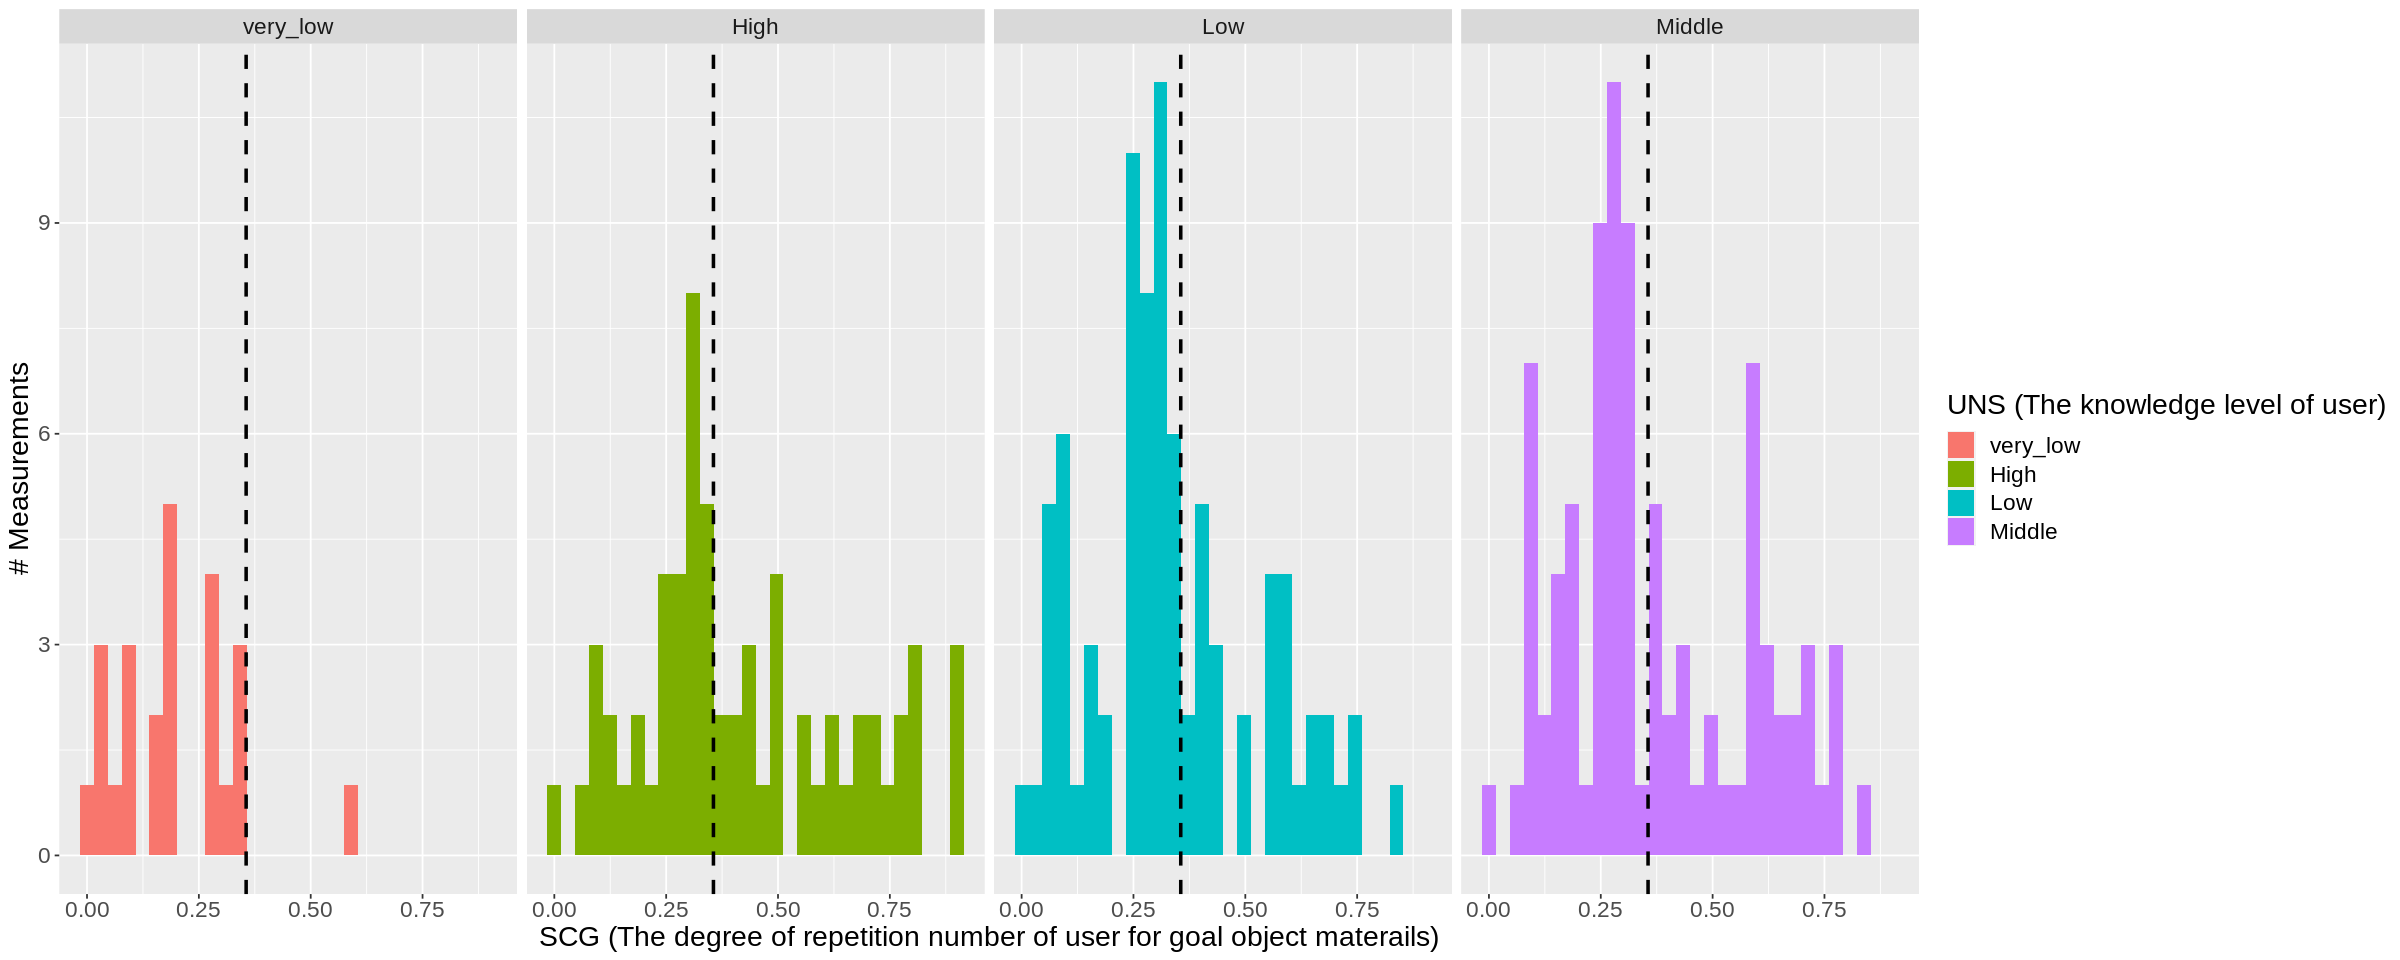

In [78]:
# The distribution of SCG
options(repr.plot.width = 20, repr.plot.height = 8) 
SCG_distribution <- user_data |>
    ggplot(aes(x = SCG, fill = UNS)) + 
    geom_histogram() +
    facet_grid(cols = vars(UNS)) +
    geom_vline(xintercept = 0.3556744, linetype = "dashed", size = 1.0) +
    labs(x = "SCG (The degree of repetition number of user for goal object materails)", 
         y = "# Measurements", 
         fill = "UNS (The knowledge level of user)") +
  theme(text = element_text(size = 17))
SCG_distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



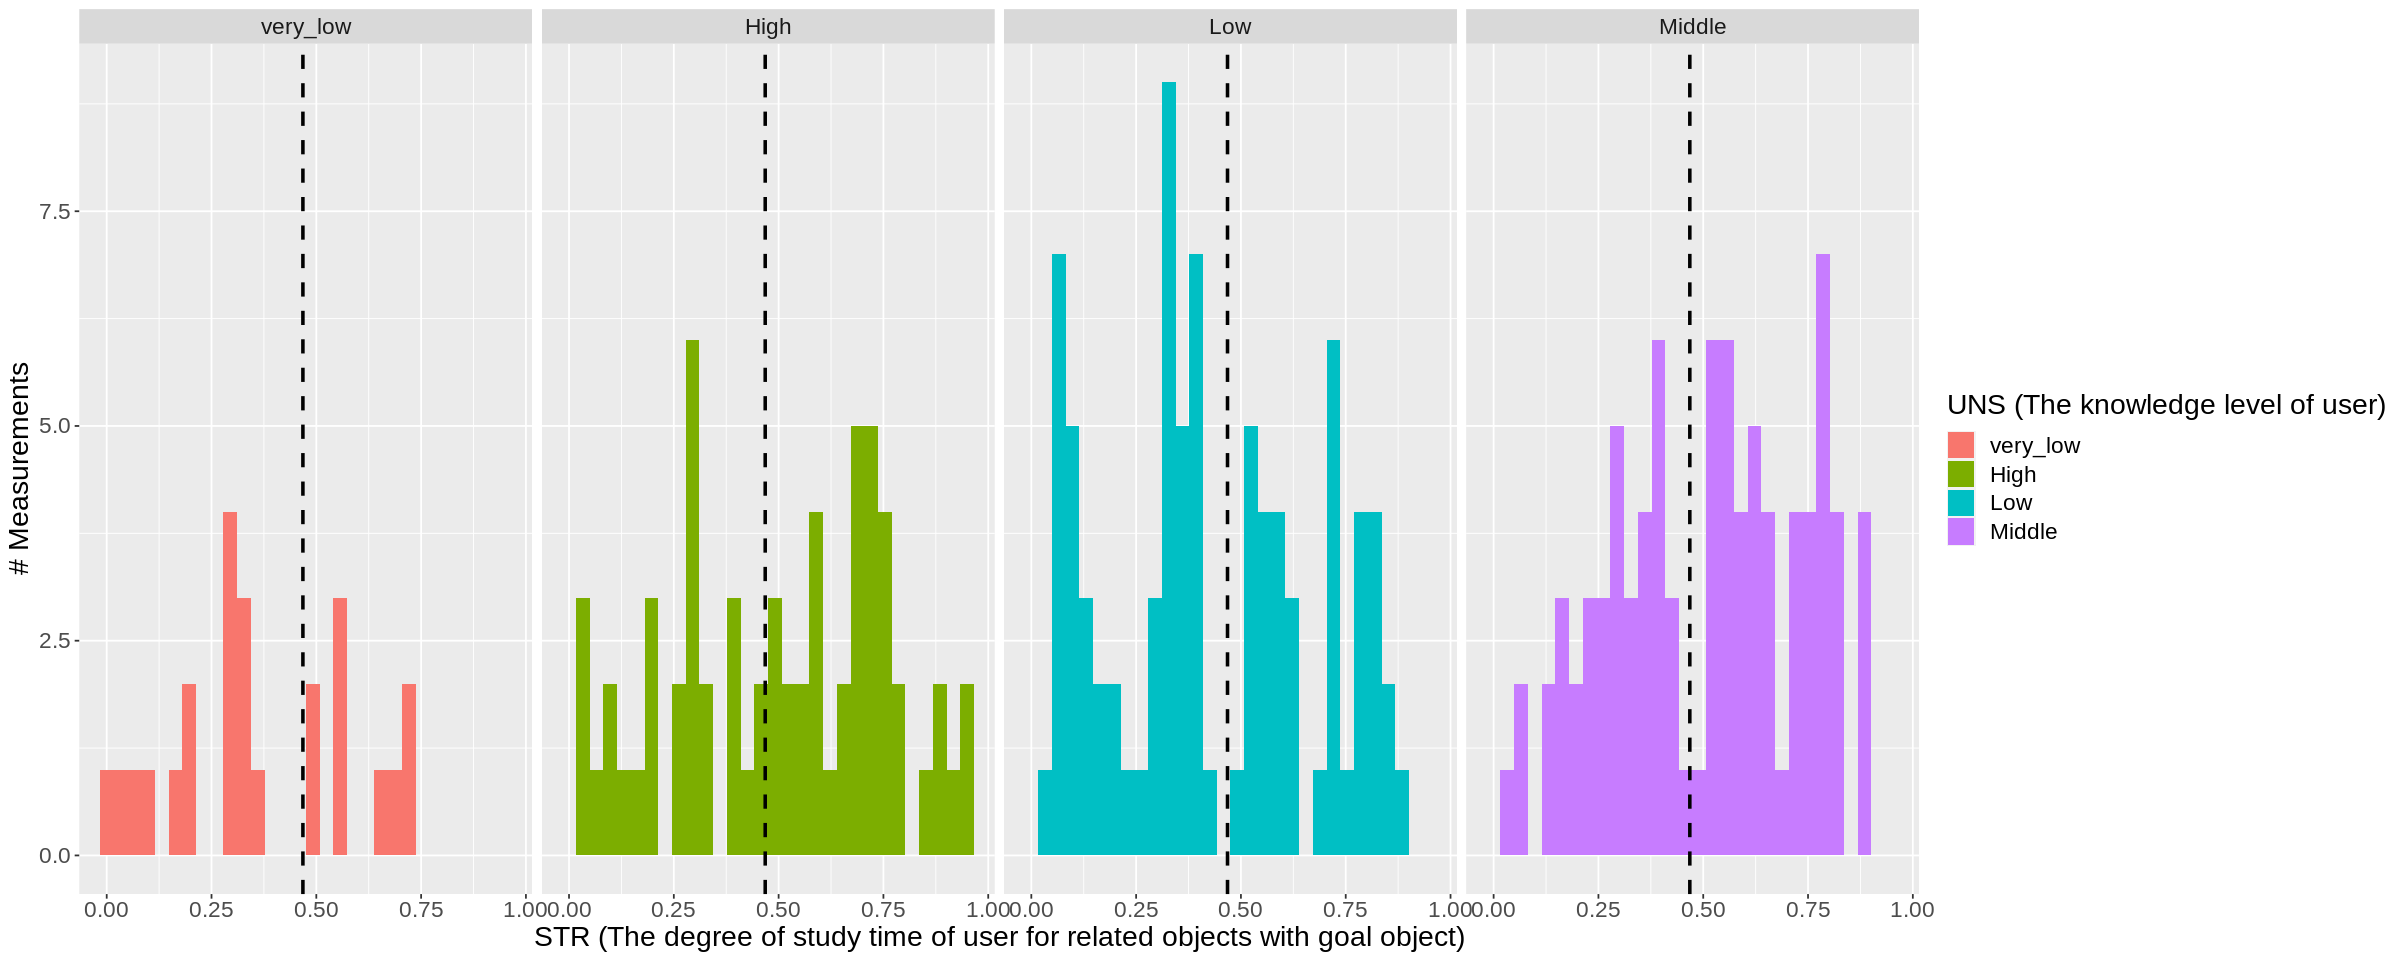

In [79]:
# The distribution of STR
options(repr.plot.width = 20, repr.plot.height = 8) 
STR_distribution <- user_data |>
    ggplot(aes(x = STR, fill = UNS)) + 
    geom_histogram() +
    facet_grid(cols = vars(UNS)) +
    geom_vline(xintercept = 0.4680039, linetype = "dashed", size = 1.0) +
    labs(x = "STR (The degree of study time of user for related objects with goal object)", 
         y = "# Measurements", 
         fill = "UNS (The knowledge level of user)") +
  theme(text = element_text(size = 17))
STR_distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



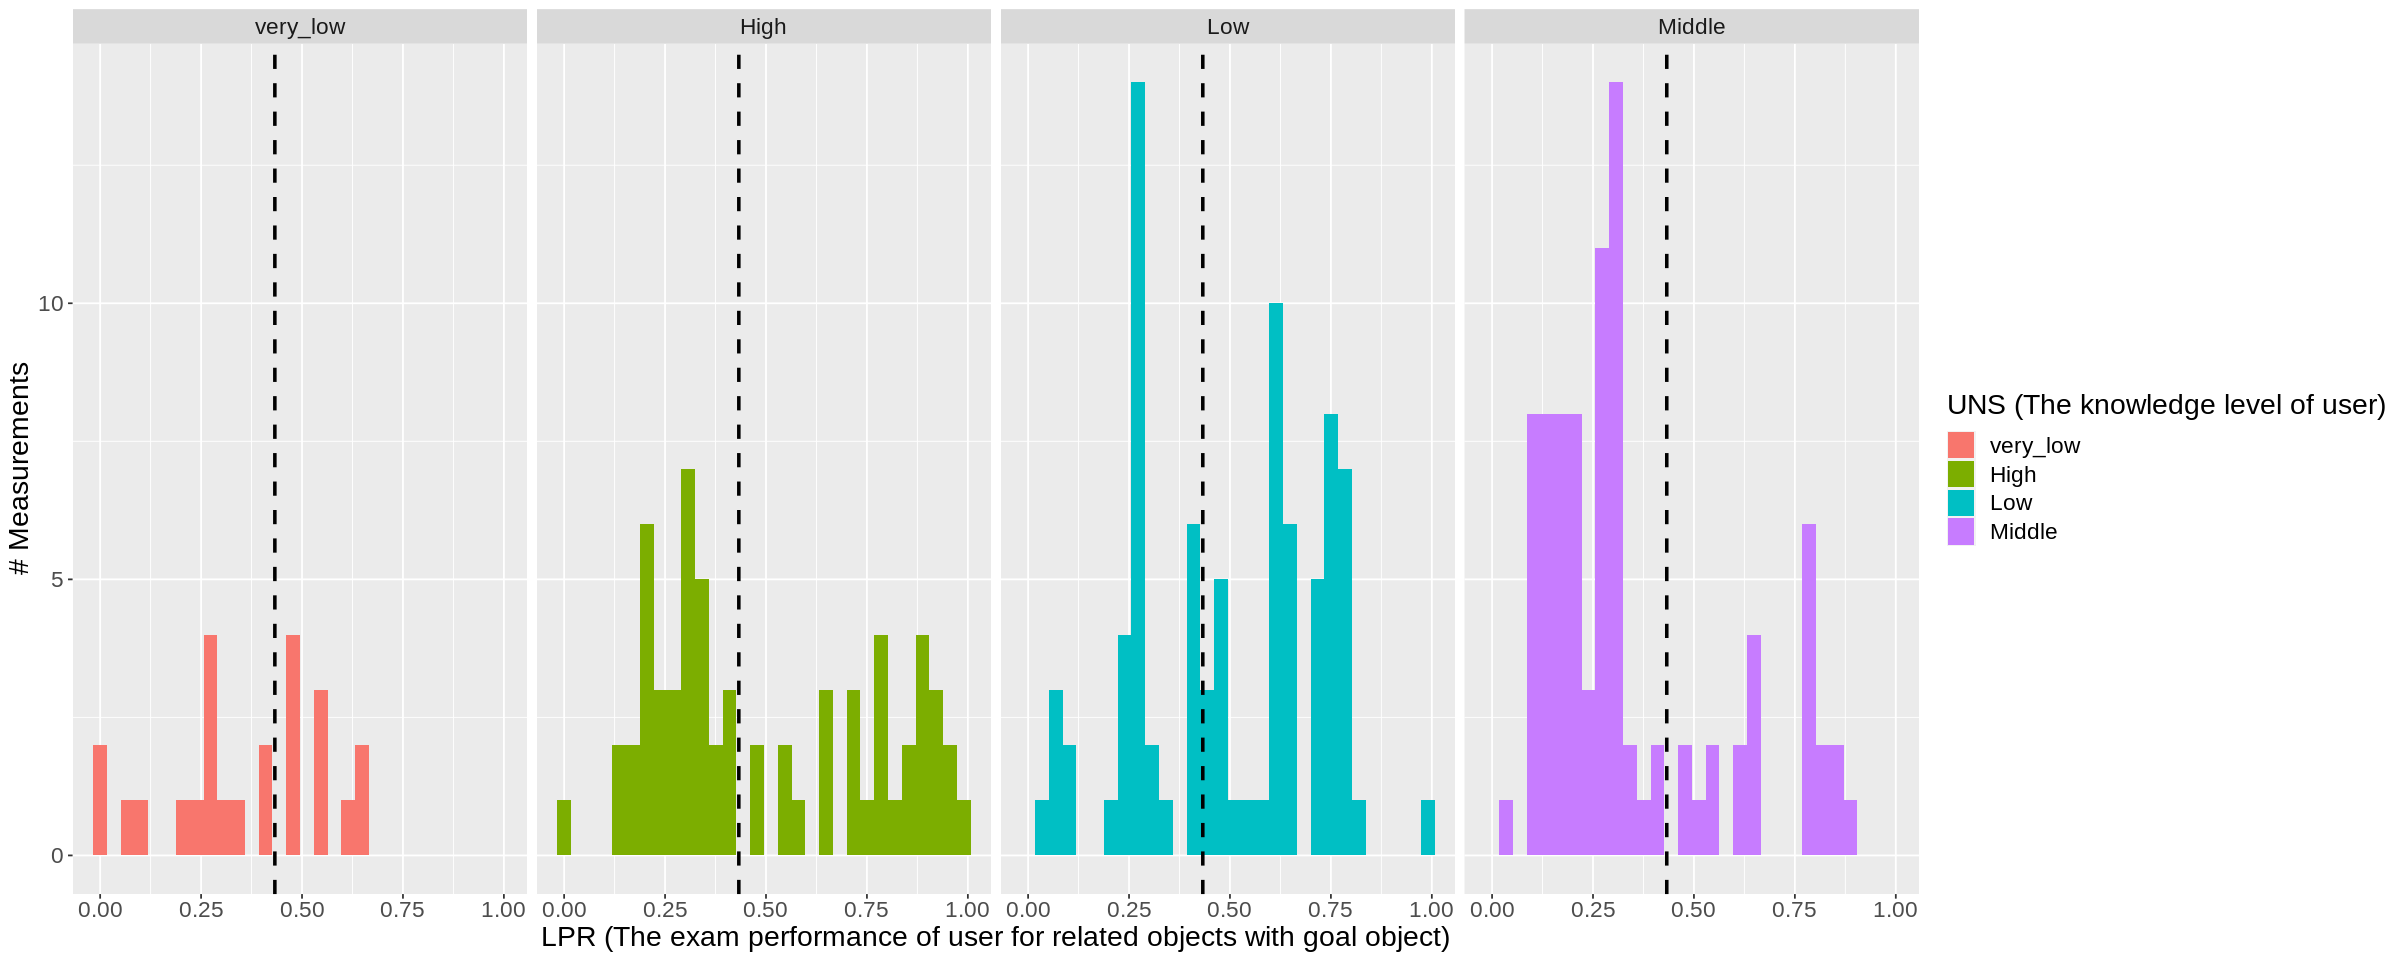

In [80]:
# The distribution of LPR
options(repr.plot.width = 20, repr.plot.height = 8) 
LPR_distribution <- user_data |>
    ggplot(aes(x = LPR, fill = UNS)) + 
    geom_histogram() +
    facet_grid(cols = vars(UNS)) +
    geom_vline(xintercept = 0.4327132, linetype = "dashed", size = 1.0) +
    labs(x = "LPR (The exam performance of user for related objects with goal object)", 
         y = "# Measurements", 
         fill = "UNS (The knowledge level of user)") +
  theme(text = element_text(size = 17))
LPR_distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



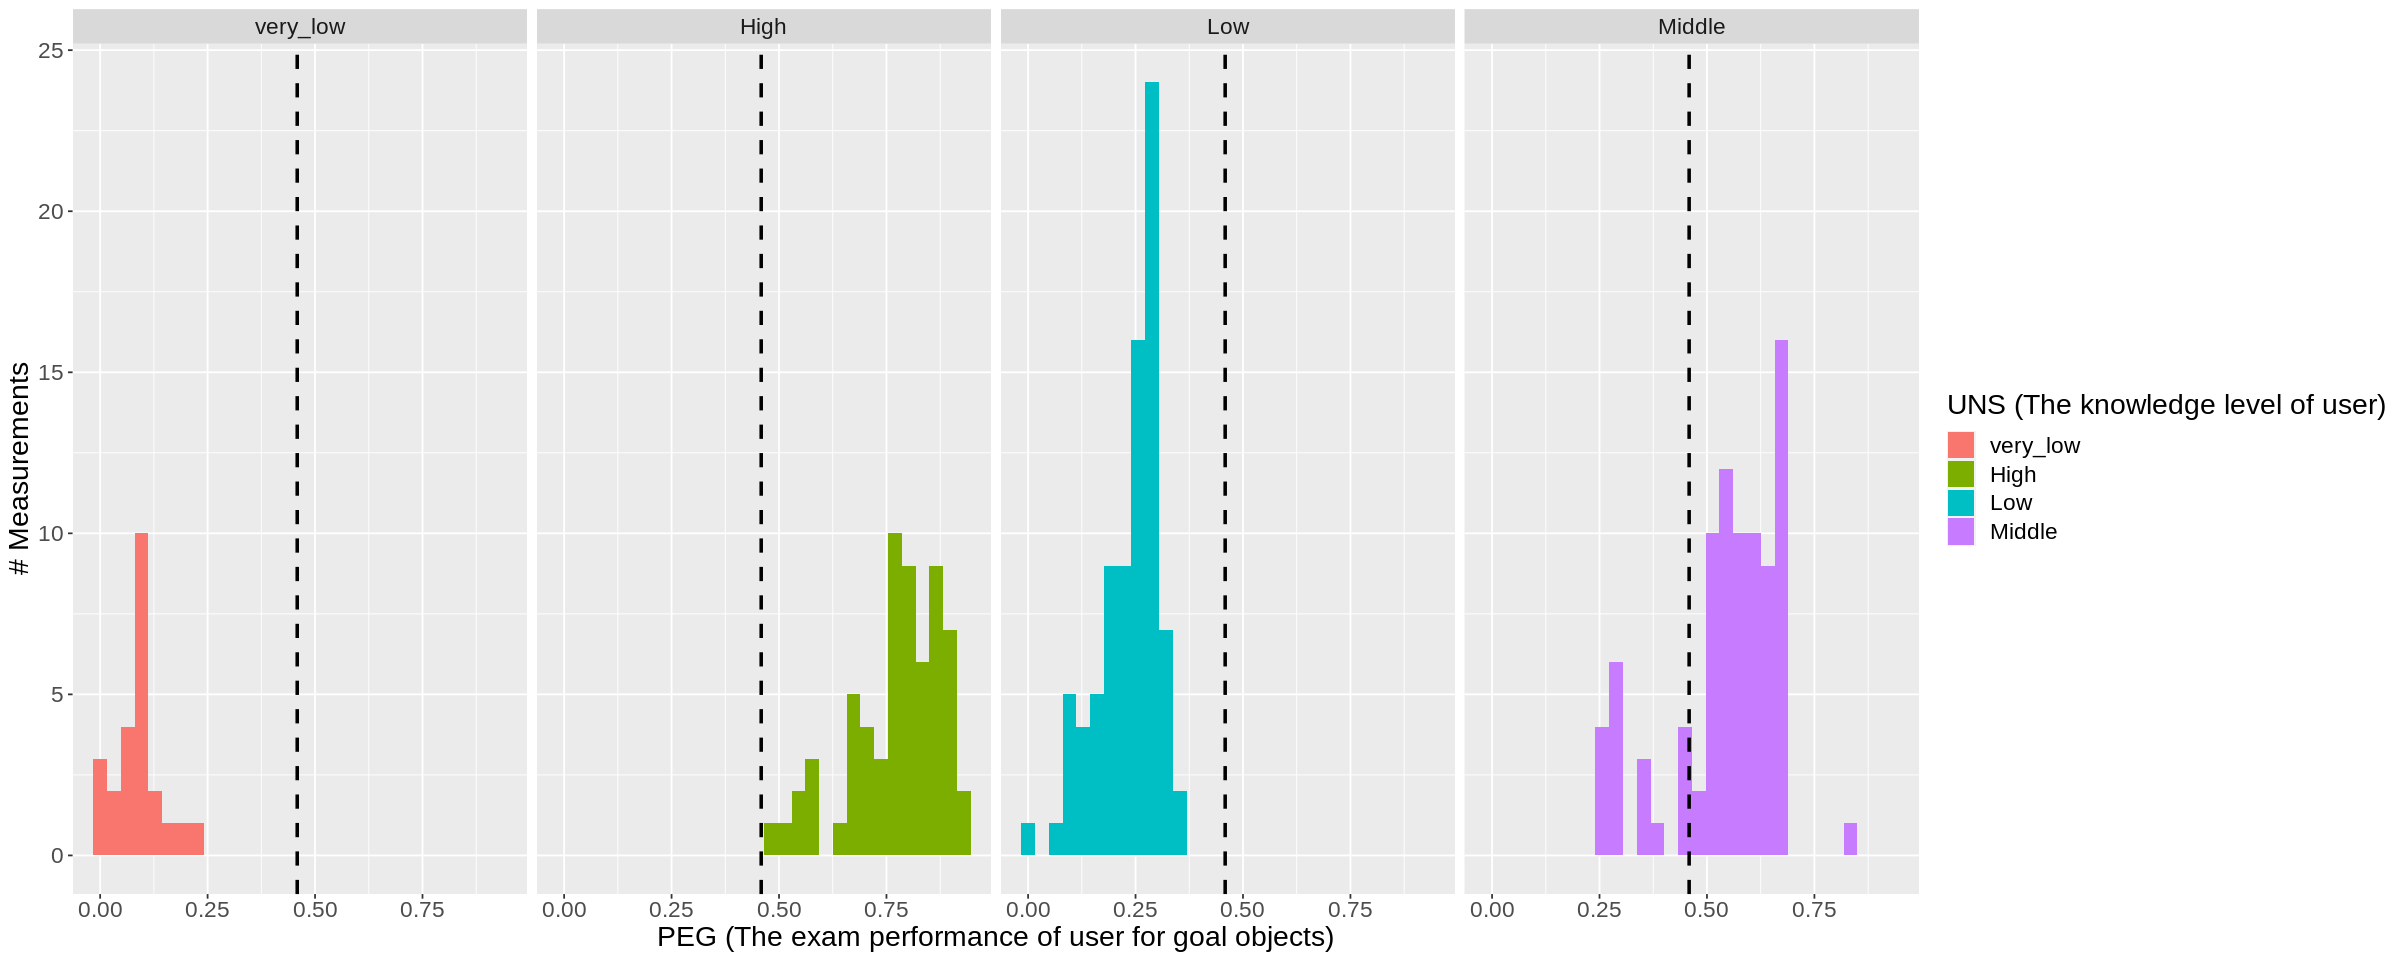

In [81]:
# The distribution of PEG
options(repr.plot.width = 20, repr.plot.height = 8) 
PEG_distribution <- user_data |>
    ggplot(aes(x = PEG, fill = UNS)) + 
    geom_histogram() +
    facet_grid(cols = vars(UNS)) +
    geom_vline(xintercept = 0.4585388, linetype = "dashed", size = 1.0) +
    labs(x = "PEG (The exam performance of user for goal objects)", 
         y = "# Measurements", 
         fill = "UNS (The knowledge level of user)") +
  theme(text = element_text(size = 17))
PEG_distribution

## Methods:
### Explain how you will conduct either your data analysis and which variables/columns you will use. 

We will perform variable selection (forward selection method) on our data set to choose our predictor variables. The steps are as follows:
 - Create a formula for the model using the paste function
 - Create a tibble to store the results of our forward selection
 - Create a model specification and 5-fold cross-validation object 
 - Add predictors to our model one at a time to form the candidate models
 - Tune the candidate models and add them to the created data frame
 - Choose the combination of predictors with the highest accuracy

### Describe at least one way that you will visualize the results

According to the results of our variable selection, we will visualize the results using graphs that are best suitable to our predictors. This may include scatter plots, histograms, bar charts or any other types of graphs included in this course. This will be done using the ggplot2 package.

## Expected outcomes and significance:
### What do you expect to find?
We expect that the more time a user spends on learning the goal materials and the more repeated learning a user has on the goal materials, the higher their knowledge level will be, and most significantly, the higher a user’s exam score is on the goal materials. Therefore, PEG or the combination STG, SCG and STR will predict the knowledge level of the user to its best extent.

### What impact could such findings have?
In the process of constructing our K-nearest classification model, we will determine how many/which columns are effective to be a predictor variable. By carefully selecting the predictor variables and the K-value, the predictions are unbiased and precise. 

These findings can lead to improved teaching strategies on the subject of Electrical DC Machines. Through constructing our K-nearest classification model, we will be able to figure out which attributes have strong predictive power on the knowledge level. Applications include instructors of the subject being able to design their syllabus accurately. If one attribute has more predictive power on the knowledge level over the others, the instructors can take that into account in their lesson plans. Furthermore, this model could help employers with screening applicants more efficiently.


### What future questions could this lead to?

- Are there external factors that could also predict the knowledge level of a user?
- Do these findings apply to other fields of study as well?
- Could these findings be applied to other fields of study outside of electrical DC machines? 

